# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
previsao_de_renda = pd.read_csv('previsao_de_renda.csv')

In [4]:
previsao_de_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [5]:
previsao_de_renda.isnull().sum()

Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

In [6]:
renda_num = previsao_de_renda.select_dtypes(include = ['float64' , 'int64'])

In [7]:
renda_num = renda_num.drop(columns = ['index' , 'Unnamed: 0'])

In [18]:
renda_num.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


In [45]:
design = sns.diverging_palette(h_neg=300, h_pos=400, as_cmap=True, sep=60, center='light')

<Axes: >

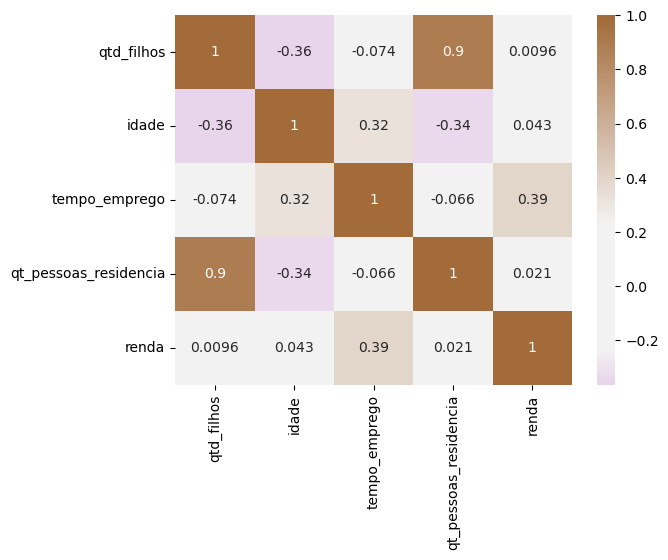

In [47]:
sns.heatmap(renda_num.corr(), annot = True, center = 0 , cmap = design)

Percebi que, embora haja uma correlação positiva relativamente forte entre o tempo de emprego e a renda, ela parece ser mais baixa do que o esperado. Esperava-se que um maior tempo de permanência no emprego se traduzisse em um aumento salarial significativo e, consequentemente, em uma renda maior.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

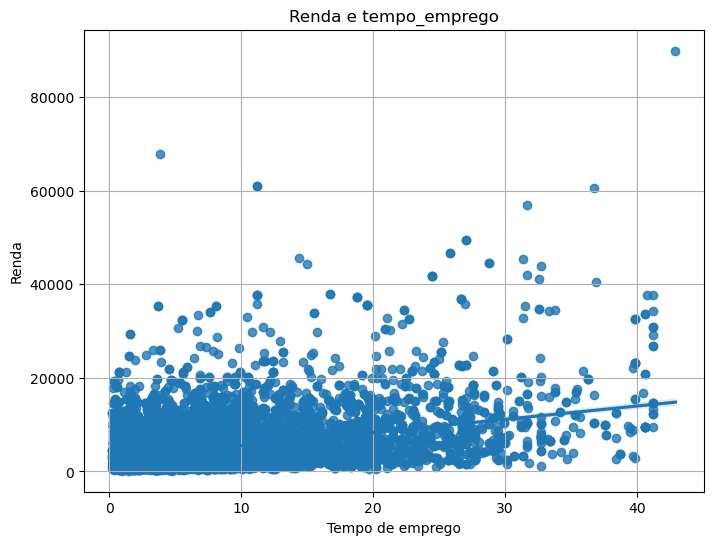

In [92]:
plt.figure(figsize=(8, 6))
sns.regplot(x='tempo_emprego', y='renda', data=renda_num)
plt.title('Renda e tempo emprego')
plt.xlabel('Tempo de emprego')
plt.ylabel('Renda')
plt.grid(True)
plt.show()

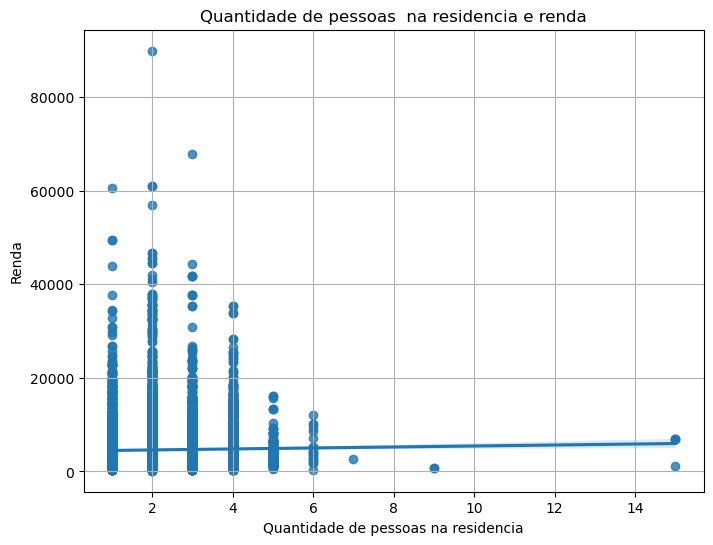

In [91]:
plt.figure(figsize=(8, 6))
sns.regplot(x='qt_pessoas_residencia', y='renda', data=renda_num)
plt.title('Quantidade de pessoas  na residencia e renda')
plt.xlabel('Quantidade de pessoas na residencia')
plt.ylabel('Renda')
plt.grid(True)
plt.show()

3) Na sua aopinião, há outliers na variável renda?

Sim, existem outliers na variável renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [97]:
renda = renda_num[['renda' , 'tempo_emprego']]

In [98]:
renda['renda_log'] = np.log(renda['renda'])

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_12488\57534650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['renda_log'] = np.log(renda['renda'])


In [104]:
renda.corr()

,renda,tempo_emprego,renda_log
renda,1.000000,0.394235,0.835734
tempo_emprego,0.394235,1.000000,0.379556
renda_log,0.835734,0.379556,1.000000


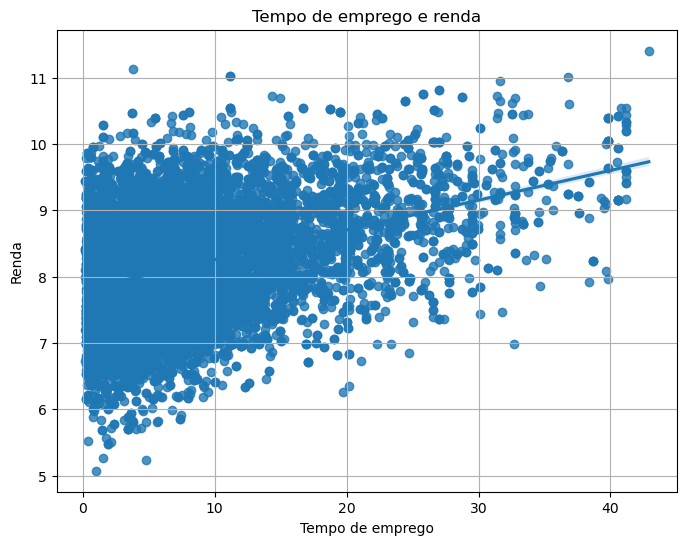

In [106]:
plt.figure(figsize=(8, 6))
sns.regplot(x = 'tempo_emprego' , y = 'renda_log' , data= renda)
plt.title('Tempo de emprego e renda')
plt.xlabel('Tempo de emprego')
plt.ylabel('Renda')
plt.grid(True)
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Acredito que a aplicação do LOG diminuiu consideravelmente os outliers na análise.